# Boundary vector score


Compare the classical borderscore which is implemented in opexebo with the one that Debora made (boundary vector score). <br>Debora provided her Matlab script - translate into python. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import sys, os
import numpy as np 

# Make plots pretty 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

import datajoint as dj

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


### Load an example ... 

In [4]:
current_session = "1f20835f09e28706"
session_key = Session.proj() & f'session_name = "{current_session}"'

In [5]:
some_ratemaps = Ratemap & session_key & 'signal_type = "spikes"' & 'map_params_id = "A"'

In [6]:
cell = 59 # 135
ratemap_entry = (some_ratemaps & f'cell_id = {cell}').fetch1()

In [7]:
rm      = np.ma.array(ratemap_entry['ratemap'], mask = ratemap_entry['mask_rm'])
rm_nans = np.ma.filled(rm, fill_value=np.nan)

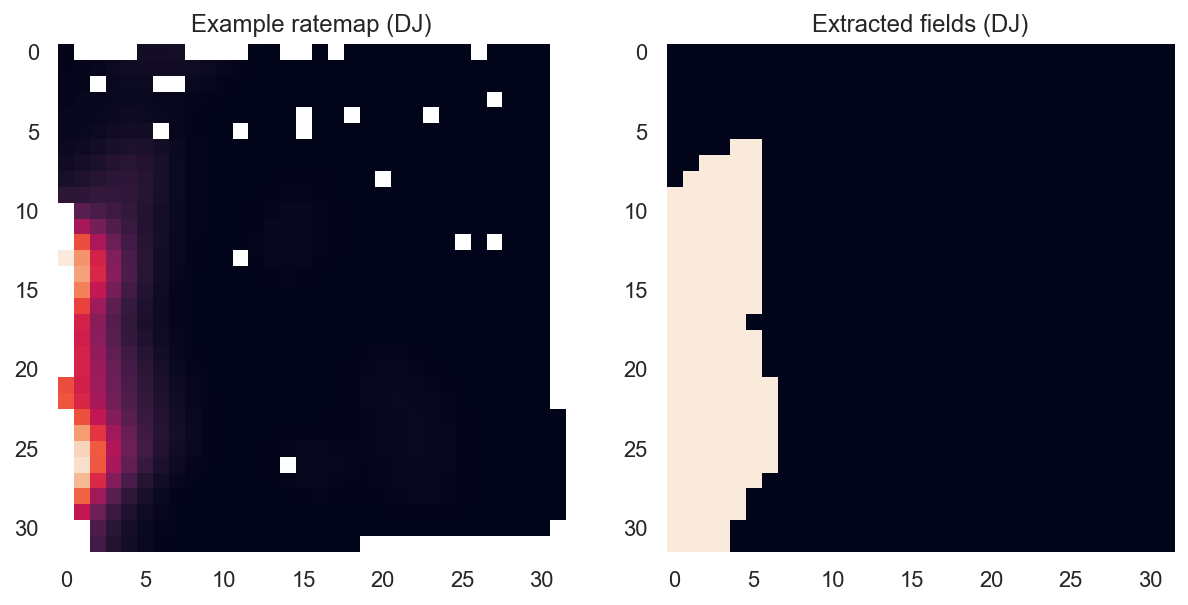

In [8]:
figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(121)
ax.imshow(rm_nans)
ax.set_title('Example ratemap (DJ)')
ax = figure.add_subplot(122)
ax.imshow(ratemap_entry['fields_map'])
ax.set_title('Extracted fields (DJ)')
sns.despine(left=True,bottom=True)

### Re-create Debora's algorithm

In [9]:
from bvs.bv_score import calc_bv_score
from bvs.detect_fields import detect_fields

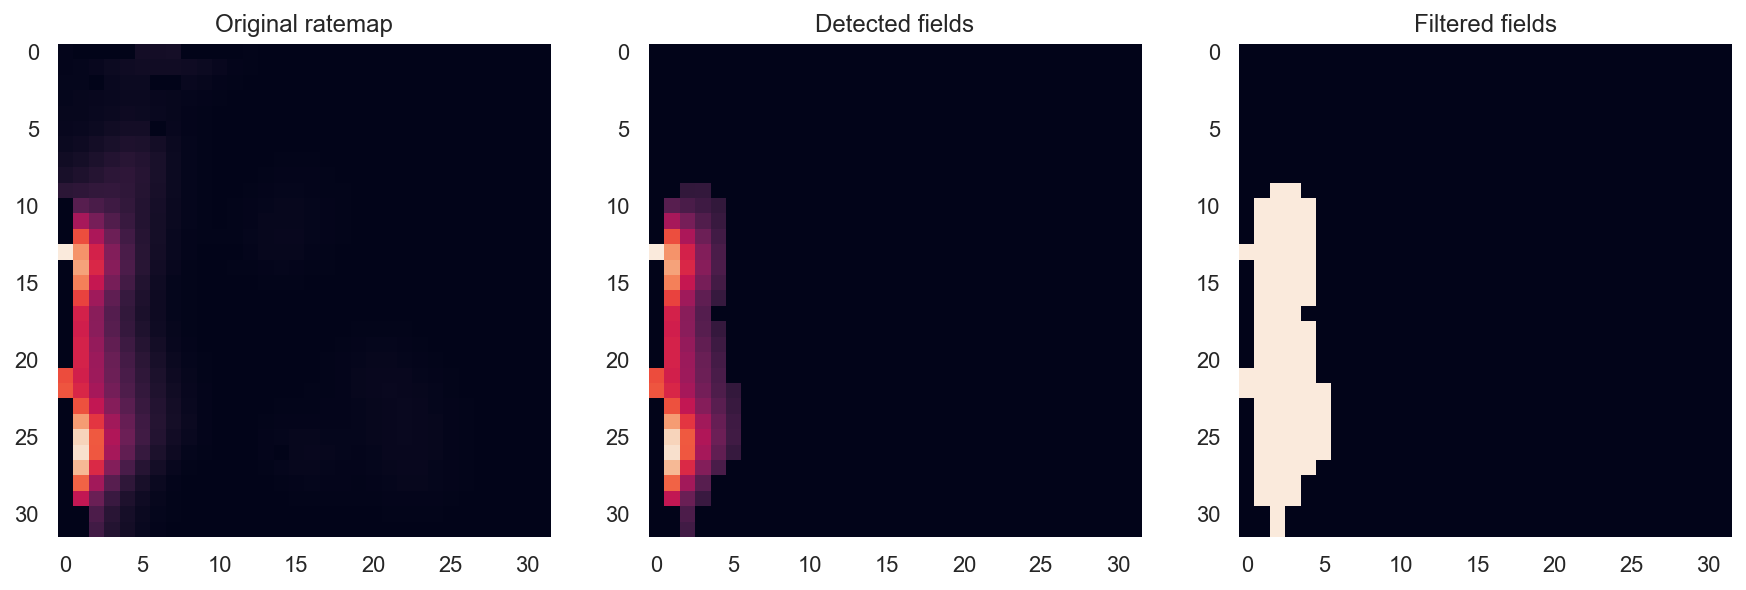

In [10]:
mapOnes, remaining_fields = detect_fields(rm_nans, show_plots=True)

In [11]:
bvs, _,_ = calc_bv_score(mapOnes, r=.5)

In [12]:
bvs # max of x and y 

0.6809475806451613